In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv("housing.csv")

In [39]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [40]:
#to see if we have any null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [41]:
#drops the null valued objects an saves it again --- data.dropna()
data.dropna(inplace=True)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [43]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [44]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [45]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [46]:
#splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
#joining all the training data
train_data = X_train.join(y_train)

In [48]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5959,-117.84,34.12,25.0,3465.0,566.0,1722.0,536.0,4.8304,INLAND,228900.0
5644,-118.29,33.75,27.0,1650.0,443.0,1359.0,386.0,2.5795,NEAR OCEAN,192400.0
16792,-122.45,37.66,35.0,2738.0,509.0,1545.0,493.0,5.3446,NEAR OCEAN,263300.0
2804,-119.03,35.45,14.0,3520.0,604.0,1748.0,582.0,4.3162,INLAND,87100.0
12210,-116.96,33.62,8.0,1003.0,167.0,388.0,140.0,4.2917,INLAND,221900.0
...,...,...,...,...,...,...,...,...,...,...
18125,-122.03,37.33,23.0,4221.0,671.0,1782.0,641.0,7.4863,<1H OCEAN,412300.0
4199,-118.24,34.12,34.0,80.0,26.0,125.0,35.0,0.8907,<1H OCEAN,154200.0
12063,-117.58,33.87,30.0,701.0,131.0,356.0,125.0,3.2917,INLAND,144300.0
5514,-118.40,33.99,39.0,1613.0,380.0,1113.0,356.0,2.8250,<1H OCEAN,276700.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

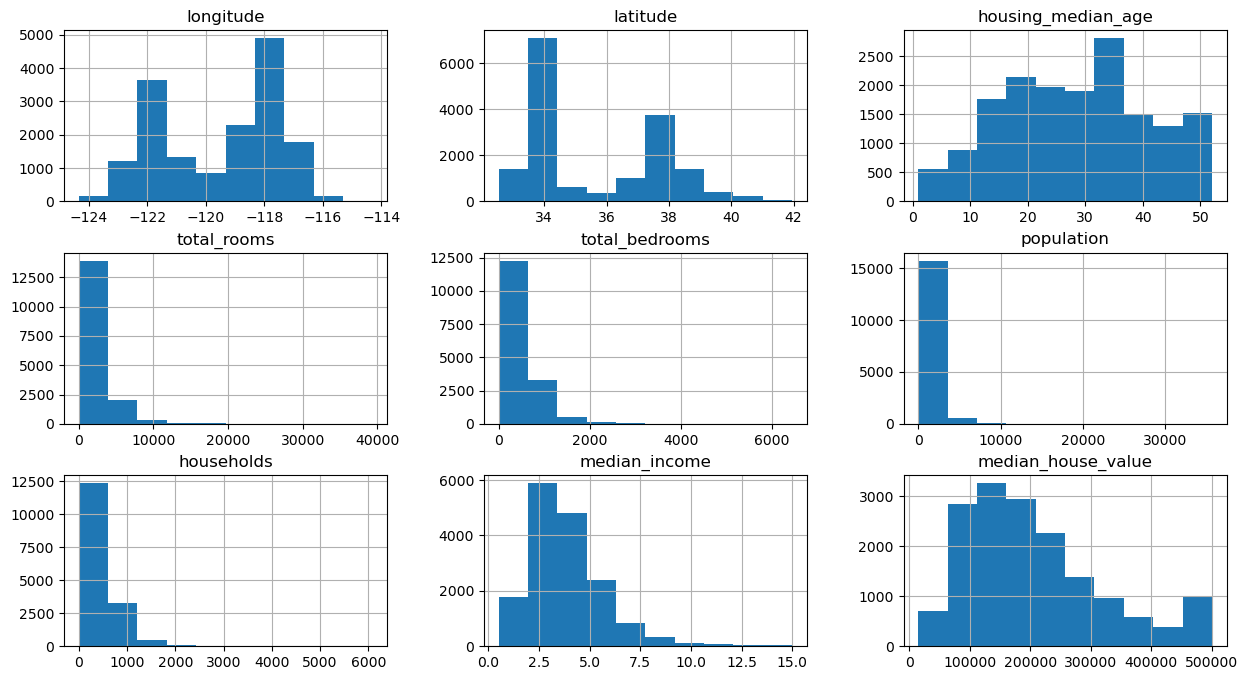

In [49]:
# drawing a histogram for every feature in the dataset
train_data.hist(figsize=(15, 8))

<AxesSubplot:>

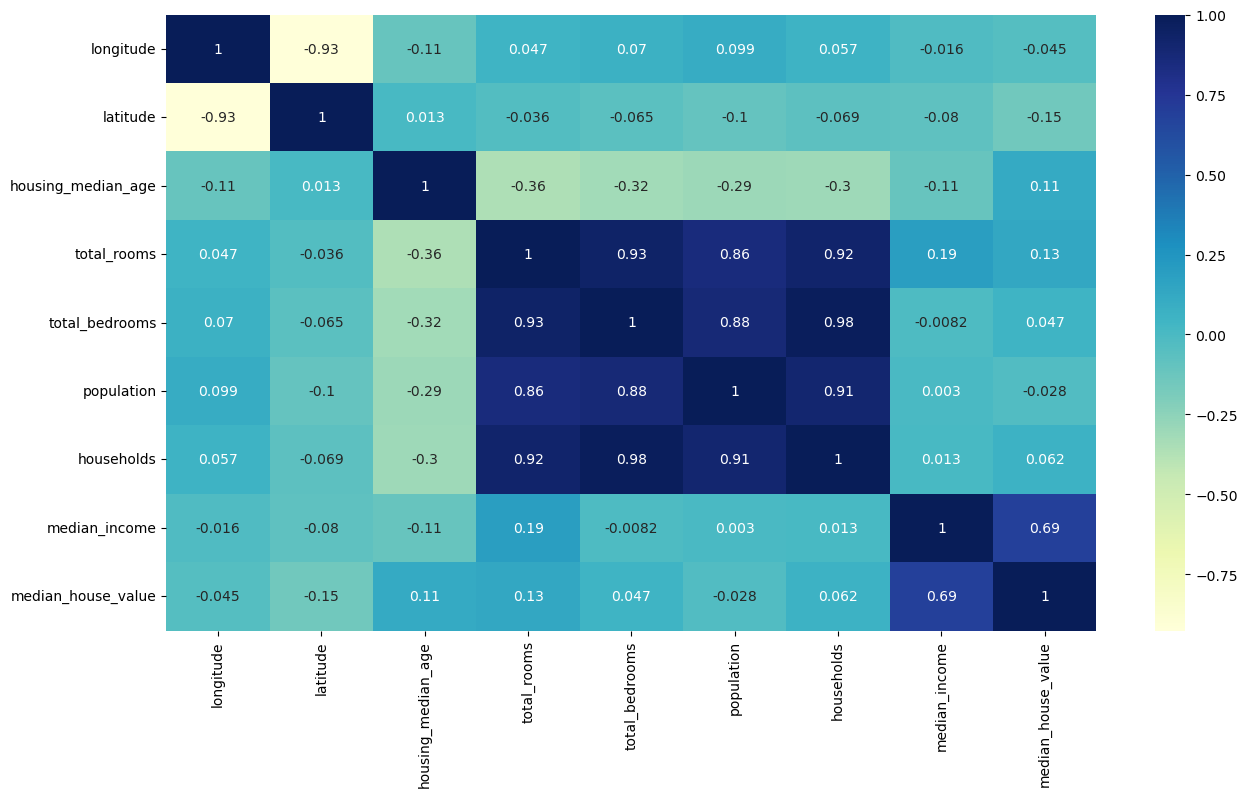

In [50]:
#to predict the correlation between the values 
#showing the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [51]:
#Form the histograms we observe that data is right skewed and not a gaussian bell curve

In [52]:
# Data Preprocessing steps
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1) # 1 is added to prvent the zero values
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] +1) 
train_data['households'] = np.log(train_data['households'] + 1) 
train_data['population'] = np.log(train_data['population'] + 1) 

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

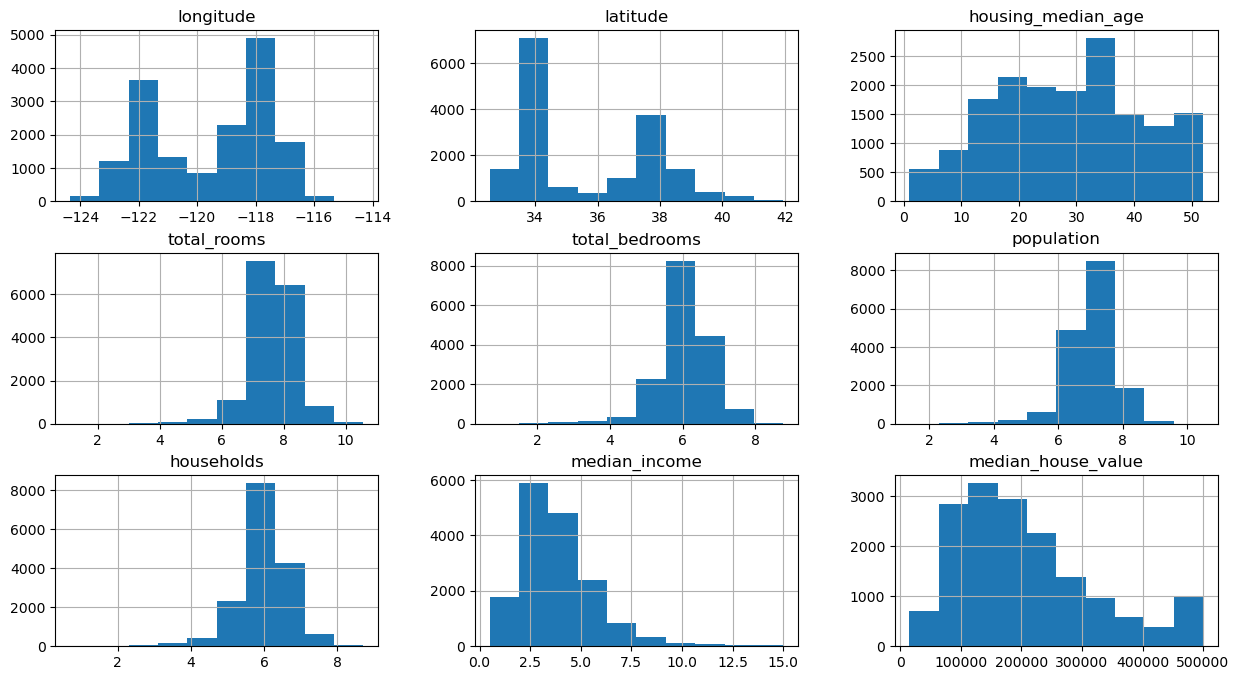

In [53]:
train_data.hist(figsize=(15,8))

In [54]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7202
INLAND        5221
NEAR OCEAN    2104
NEAR BAY      1815
ISLAND           4
Name: ocean_proximity, dtype: int64

In [55]:
#one hot encoding in pandas to convert strings in ocean_proximity to values
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [56]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5959,-117.84,34.12,25.0,8.150756,6.340359,7.451822,6.285998,4.8304,228900.0,0,1,0,0,0
5644,-118.29,33.75,27.0,7.409136,6.095825,7.215240,5.958425,2.5795,192400.0,0,0,0,0,1
16792,-122.45,37.66,35.0,7.915348,6.234411,7.343426,6.202536,5.3446,263300.0,0,0,0,0,1
2804,-119.03,35.45,14.0,8.166500,6.405228,7.466799,6.368187,4.3162,87100.0,0,1,0,0,0
12210,-116.96,33.62,8.0,6.911747,5.123964,5.963579,4.948760,4.2917,221900.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18125,-122.03,37.33,23.0,8.348064,6.510258,7.486053,6.464588,7.4863,412300.0,1,0,0,0,0
4199,-118.24,34.12,34.0,4.394449,3.295837,4.836282,3.583519,0.8907,154200.0,1,0,0,0,0
12063,-117.58,33.87,30.0,6.553933,4.882802,5.877736,4.836282,3.2917,144300.0,0,1,0,0,0
5514,-118.40,33.99,39.0,7.386471,5.942799,7.015712,5.877736,2.8250,276700.0,1,0,0,0,0


<AxesSubplot:>

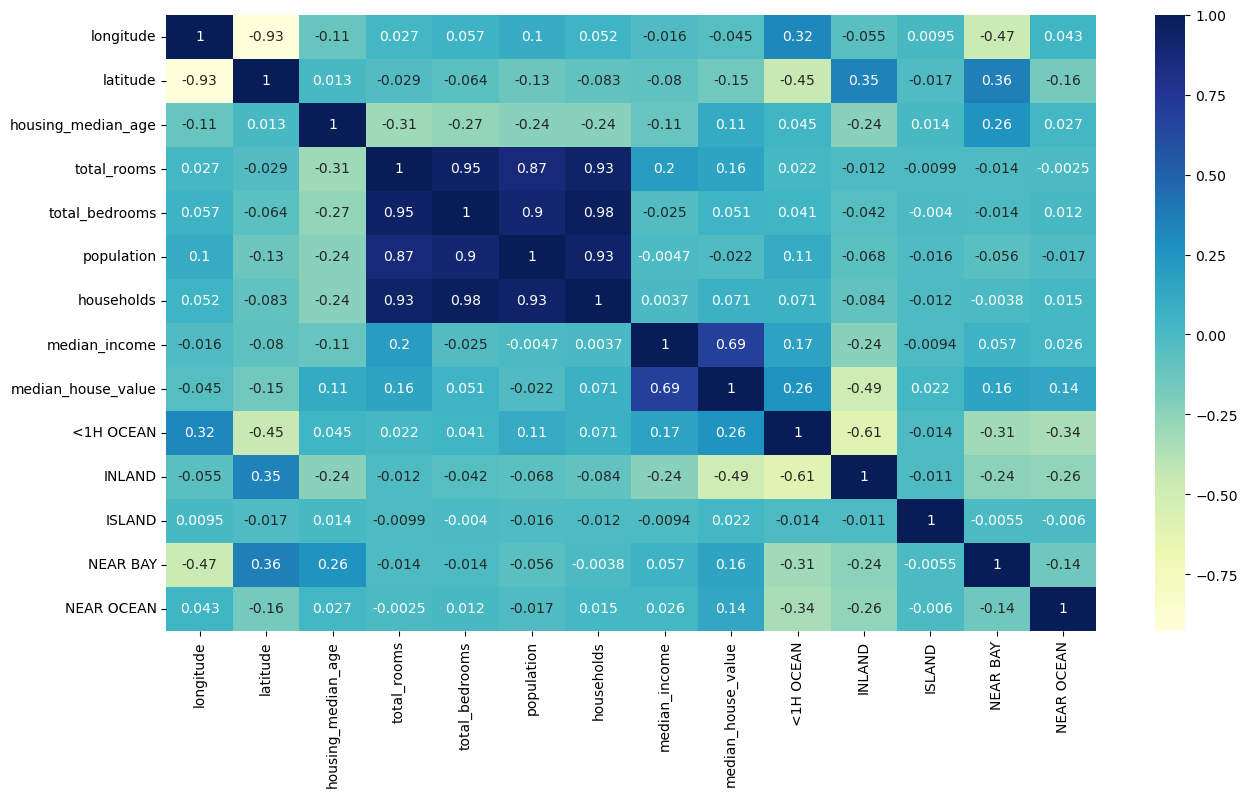

In [57]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

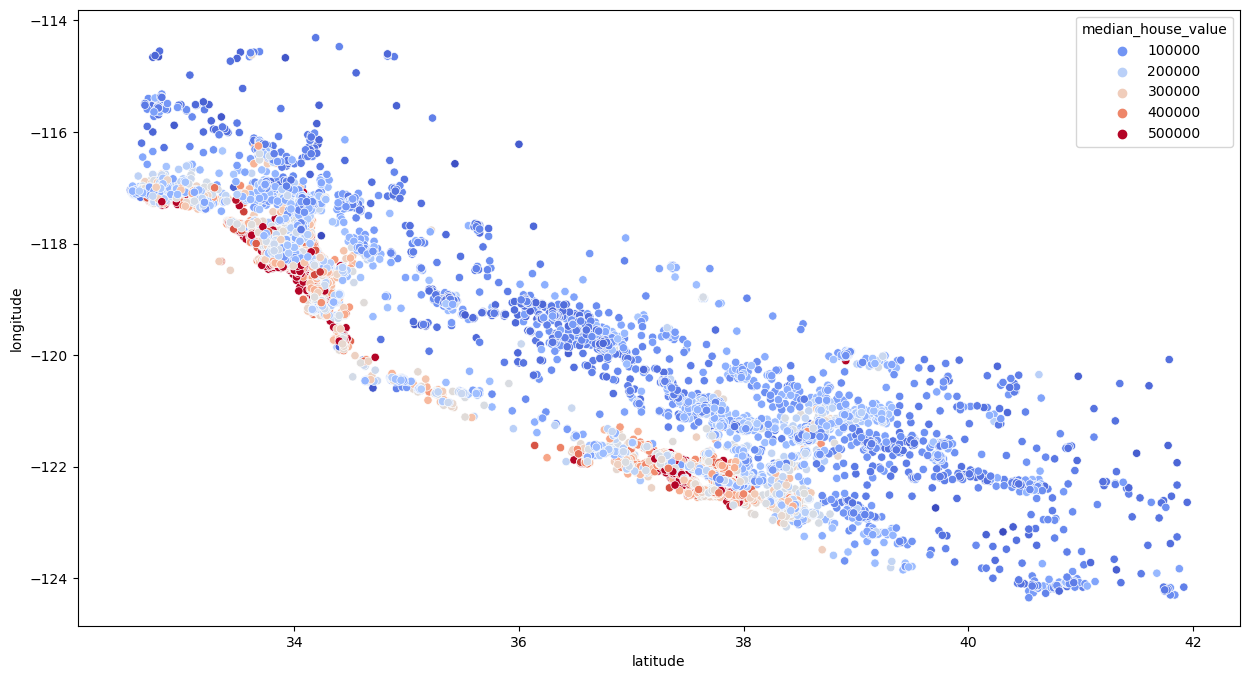

In [58]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [59]:
#Feature Engineering
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<AxesSubplot:>

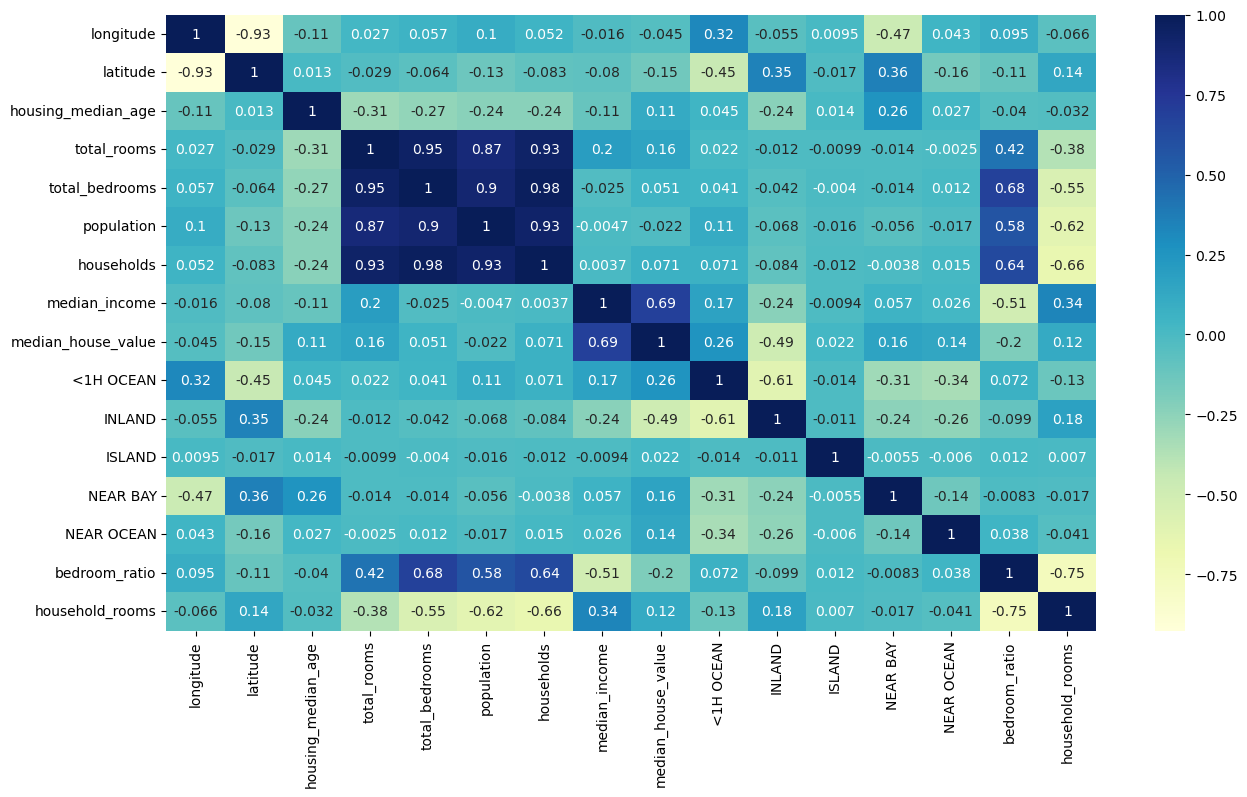

In [60]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [62]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1) # 1 is added to prvent the zero values
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] +1) 
test_data['households'] = np.log(test_data['households'] + 1) 
test_data['population'] = np.log(test_data['population'] + 1) 

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [63]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [64]:
reg.score(X_test, y_test)

0.6844862761111498

In [65]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [66]:
forest.score(X_test, y_test)

0.8193145698487906